In [945]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import silhouette_score
from scipy.stats import iqr,zscore
from kneed import KneeLocator

In [890]:
import warnings
warnings.filterwarnings('ignore')

In [891]:
df=pd.read_csv('C:/Users/NANDAKUMAR/Desktop/SUMITHRA/DATASCIENCE/Data set/customer_segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [892]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [893]:
df.shape

(2000, 8)

In [894]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [895]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [ ]:
# !pip install kneed

In [896]:
dff=df.drop(['ID', 'Sex', 'Marital status', 'Education','Occupation', 'Settlement size'],axis=1)

In [897]:
dff.head()

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031


<AxesSubplot:xlabel='Income'>

<Figure size 1440x1440 with 0 Axes>

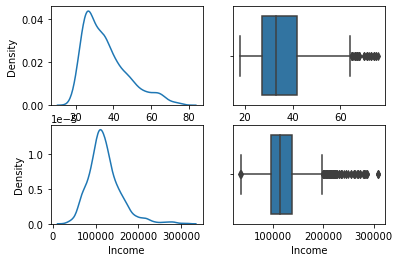

In [898]:
plt.figure(figsize=(20,20))
fig,ax=plt.subplots(2,2)
sns.kdeplot(dff['Age'],ax=ax[0,0])
sns.boxplot(dff['Age'],ax=ax[0,1])
sns.kdeplot(dff['Income'],ax=ax[1,0])
sns.boxplot(dff['Income'],ax=ax[1,1])

<AxesSubplot:>

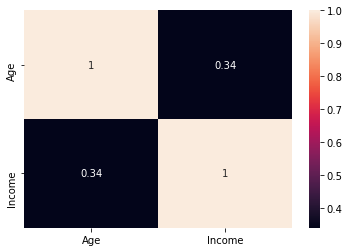

In [899]:
sns.heatmap(dff.corr(),annot=True)

In [900]:
col=dff.columns
col
for i in col:
    q1,q2,q3=dff[i].quantile([.25,.50,.75])
    IQR=q3-q1
    lcap=q1-1.5*IQR
    ucap=q3+1.5*IQR
    print('lcap of {} is {}'.format(i,lcap))
    print('ucap of {} is {}'.format(i,ucap))
          
    dff[i]=dff[i].apply(lambda x:ucap if (x>ucap) else lcap if (x<lcap) else x )
    

lcap of Age is 4.5
ucap of Age is 64.5
lcap of Income is 37049.75
ucap of Income is 198685.75


In [901]:
# dff.describe()

In [902]:
dff[dff.duplicated()==True].count()
dff=dff.drop_duplicates()
dff.shape

(1954, 2)

<AxesSubplot:xlabel='Income'>

<Figure size 1440x1440 with 0 Axes>

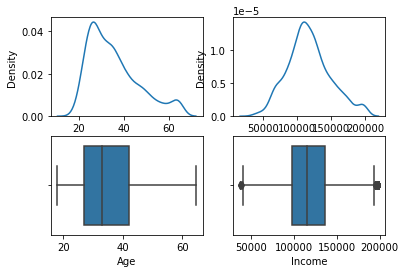

In [903]:
plt.figure(figsize=(20,20))
fig,ax=plt.subplots(2,2)
sns.kdeplot(dff['Age'],ax=ax[0,0])
sns.kdeplot(dff['Income'],ax=ax[0,1])
sns.boxplot(dff['Age'],ax=ax[1,0])
sns.boxplot(dff['Income'],ax=ax[1,1])

In [911]:

dff=dff.apply(zscore)
dff.head()

,Age,Income
0,2.571040,0.218926
1,-1.206028,1.039278
2,1.193521,-0.895494
3,0.838032,1.692719
4,1.549010,0.984531


In [912]:
wcss=[]
sil_score=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=111)
    kmeans.fit(dff)
    y_pred=kmeans.predict(dff)
    wcss.append(kmeans.inertia_)
    ss=silhouette_score(dff[['Age','Income']],y_pred)
    sil_score.append(ss)
    print('silhouette_score_k={} is {}'.format(k,ss))

silhouette_score_k=2 is 0.41589442969906787
silhouette_score_k=3 is 0.390758056390599
silhouette_score_k=4 is 0.3740057650862992
silhouette_score_k=5 is 0.35937405207977496
silhouette_score_k=6 is 0.35535255536578203
silhouette_score_k=7 is 0.36817527128341293
silhouette_score_k=8 is 0.3636089568122312
silhouette_score_k=9 is 0.36957808859800473
silhouette_score_k=10 is 0.37989909174180037


Text(0, 0.5, 'wcss')

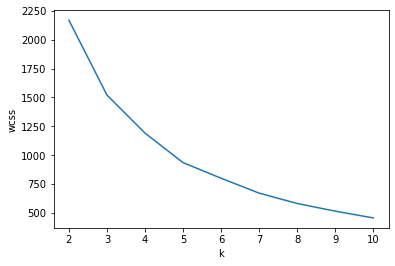

In [913]:
sns.lineplot(range(2,11),wcss,markers='O')
plt.xlabel('k')
plt.ylabel('wcss')


In [949]:
kl=KneeLocator(range(2,11),wcss,direction= 'decreasing')
kl.elbow

10

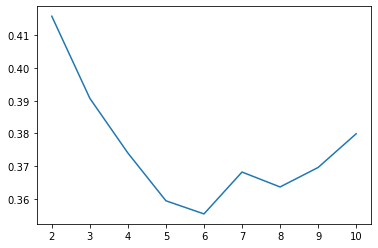

In [914]:
plt.plot(range(2,11),sil_score)

In [915]:
k_means=KMeans(n_clusters=3)
k_means.fit(dff)
ypred=k_means.predict(dff)
ypred

array([1, 2, 1, ..., 0, 0, 0])

In [916]:
dff['cluster']=ypred

In [917]:
dff.head()

,Age,Income,cluster
0,2.571040,0.218926,1
1,-1.206028,1.039278,2
2,1.193521,-0.895494,1
3,0.838032,1.692719,2
4,1.549010,0.984531,1


In [957]:
a=display(dff.groupby(['cluster']).all)
a

<bound method GroupBy.all of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002CC55525790>>

In [919]:
centroid=k_means.cluster_centers_
# centroid=10**centroid
centroid

array([[-0.53741127, -0.65690744],
       [ 1.54411842,  0.46690603],
       [-0.19998774,  1.02453353]])

<AxesSubplot:xlabel='Age', ylabel='Income'>

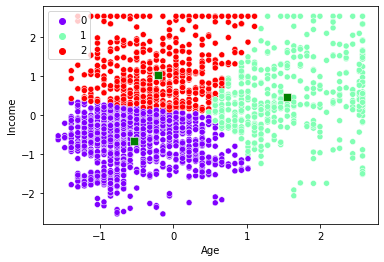

In [920]:
sns.scatterplot(dff['Age'], dff['Income'], hue=dff['cluster'],palette='rainbow') 
sns.scatterplot(centroid[:,0],centroid[:,1],color='green',marker='s',s=50)

In [942]:
k_means.predict([[67,124670]])

array([2])